# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_arch

# Import Data

In [2]:
path = '../dataset/feature engineering/clean_data.pkl'

df = pd.read_pickle(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   priceidx          1421 non-null   float64       
 2   logreturn_idx     1421 non-null   float64       
 3   pricenyse         1421 non-null   float64       
 4   logreturn_nyse    1421 non-null   float64       
 5   usdidr            1421 non-null   float64       
 6   logreturn_usdidr  1421 non-null   float64       
 7   suku_bunga        1421 non-null   float64       
 8   diffsukubunga     1421 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 100.0 KB


In [3]:
df.head(5)

,date,priceidx,logreturn_idx,pricenyse,logreturn_nyse,usdidr,logreturn_usdidr,suku_bunga,diffsukubunga
0,2020-01-03,557.65,0.009459,13917.049805,-0.006120,13925.0,0.002589,0.0,0.0
1,2020-01-06,551.66,-0.010800,13941.799805,0.001777,13940.0,0.001077,0.0,0.0
2,2020-01-07,554.00,0.004233,13898.450195,-0.003114,13875.0,-0.004674,0.0,0.0
3,2020-01-08,549.01,-0.009048,13934.440430,0.002586,13892.5,0.001260,0.0,0.0
4,2020-01-09,555.10,0.011032,13997.650391,0.004526,13850.0,-0.003064,0.0,0.0


In [4]:
df.describe()

,date,priceidx,logreturn_idx,pricenyse,logreturn_nyse,usdidr,logreturn_usdidr,suku_bunga,diffsukubunga
count,1421,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,2022-12-06 06:04:48.810696448,473.598086,-0.000156,16368.546735,0.000340,15165.190007,0.000105,4.694933,-0.000176
min,2020-01-03 00:00:00,311.880000,-0.092473,8777.379883,-0.125950,13572.500000,-0.027844,0.000000,-0.250000
25%,2021-06-23 00:00:00,440.290000,-0.007022,14946.009766,-0.004628,14395.000000,-0.001366,3.500000,0.000000
50%,2022-11-29 00:00:00,483.970000,0.000091,16143.950195,0.000362,15050.000000,0.000000,4.750000,0.000000
75%,2024-05-30 00:00:00,504.380000,0.005989,18028.169922,0.005845,15805.000000,0.001883,5.750000,0.000000
max,2025-11-19 00:00:00,583.110000,0.142235,21807.330078,0.095642,16870.000000,0.044659,6.250000,0.500000
std,NaN,47.169055,0.013817,2535.123930,0.012334,829.177208,0.004097,1.274583,0.035726


<function matplotlib.pyplot.show(close=None, block=None)>

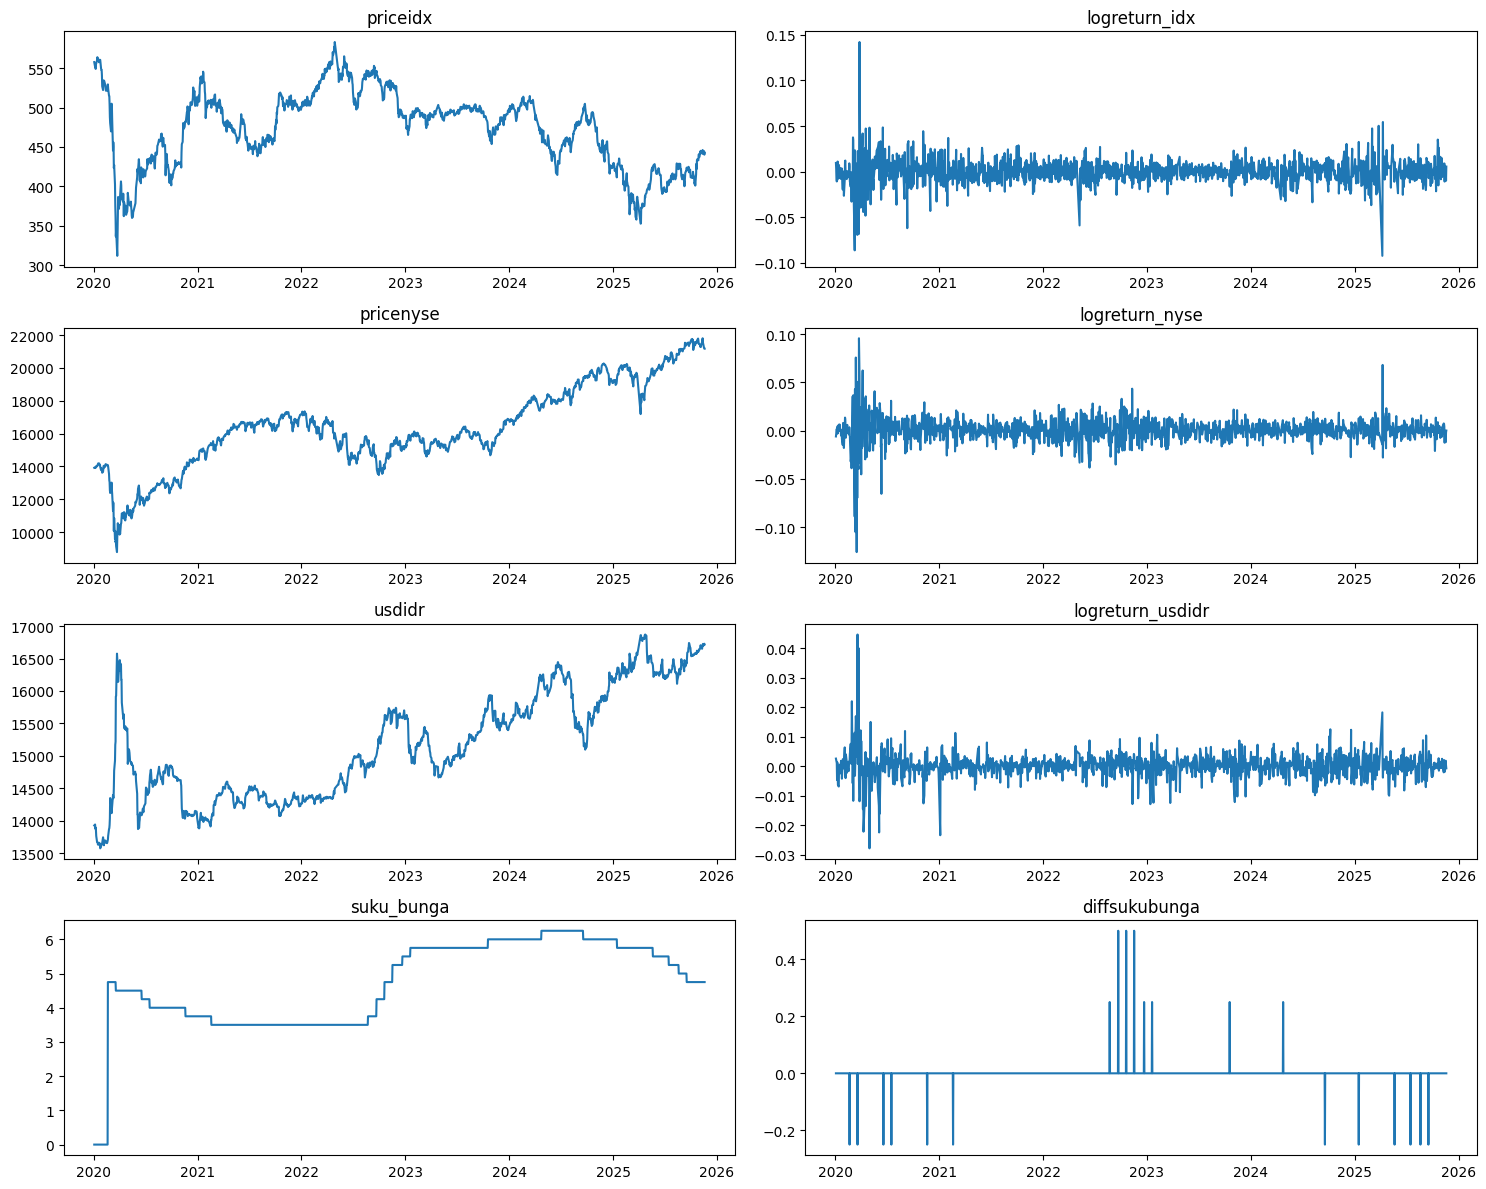

In [5]:
x = df['date']
koloms = ['priceidx', 'logreturn_idx', 'pricenyse', 'logreturn_nyse', 'usdidr', 'logreturn_usdidr', 'suku_bunga', 'diffsukubunga']

fig, axes = plt.subplots(4,2, figsize=(15,12))
axes = axes.flatten()

for i, kolom in enumerate(koloms):
    axes[i].plot(x, df[kolom])
    axes[i].set_title(kolom)

plt.tight_layout()
plt.show

# Uji Stasioneritas ADF

In [6]:
def adf_test(data, name):
    data = data.dropna() #menghapus data yang kosong
    stat, pval, lags, nobs, *_ = adfuller(data, autolag='AIC') #mengambil nilai adf stats, p-value, lags, jumlah observasi dan keputusan

    return {
        'Variabel':name,
        'ADF Statistik' : round(stat, 3),
        'p-value' : f"{pval:.3f}",
        'lags_used' : lags,
        'jumlah observasi' : nobs,
        'keputusan' : 'stasioner' if pval < 0.05 else 'tidak stasioner'
    }

hasil_adf = [] #simpan hasil uji adf

for i in df.columns:
    hasil_adf.append(adf_test(df[i], i))

hasil_adf = pd.DataFrame(hasil_adf) #buat dataframe hasil uji adf
hasil_adf

,Variabel,ADF Statistik,p-value,lags_used,jumlah observasi,keputusan
0,date,7.847,1.000,17,1403,tidak stasioner
1,priceidx,-2.890,0.046,16,1404,stasioner
2,logreturn_idx,-8.361,0.000,18,1402,stasioner
3,pricenyse,-0.687,0.850,4,1416,tidak stasioner
4,logreturn_nyse,-9.757,0.000,12,1408,stasioner
5,usdidr,-1.827,0.367,4,1416,tidak stasioner
6,logreturn_usdidr,-15.808,0.000,3,1417,stasioner
7,suku_bunga,-3.704,0.004,0,1420,stasioner
8,diffsukubunga,-4.140,0.001,24,1396,stasioner


In [7]:
#drop kolom yang tidak digunakan

drop_columns = ['pricenyse', 'priceidx', 'usdidr']

for i in drop_columns:
    df = df.drop(columns=i)
    print(f"kolom {i} telah terhapus")

kolom pricenyse telah terhapus
kolom priceidx telah terhapus
kolom usdidr telah terhapus


# Uji ARCH-LM

In [8]:
def arch_lm_test(data, name, lags=5):
    data = data.dropna()
    
    lm_stat, lm_pvalue, f_stat, f_pvalue = het_arch(data, nlags=lags)
    
    return {
        'Variabel': name,
        'ARCH LM Statistic': round(lm_stat, 4),
        'ARCH LM p-value': round(lm_pvalue, 4),
        'F Statistic': round(f_stat, 4),
        'F p-value': round(f_pvalue, 4),
        'Heteroskedastisitas (ARCH)': 'Ya' if lm_pvalue < 0.05 else 'Tidak'
    }

hasil_arch = []

for i in df.select_dtypes(include='float64').columns:
    hasil_arch.append(arch_lm_test(df[i], i, lags=5))

hasil_arch = pd.DataFrame(hasil_arch) #buat dataframe hasil uji arch-lm
hasil_arch

,Variabel,ARCH LM Statistic,ARCH LM p-value,F Statistic,F p-value,Heteroskedastisitas (ARCH)
0,logreturn_idx,215.5888,0.0000,50.6460,0.0000,Ya
1,logreturn_nyse,520.1315,0.0000,163.7261,0.0000,Ya
2,logreturn_usdidr,304.2187,0.0000,77.1642,0.0000,Ya
3,suku_bunga,1409.9672,0.0000,65908.0038,0.0000,Ya
4,diffsukubunga,0.6251,0.9868,0.1246,0.9869,Tidak


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1421 entries, 0 to 1420
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1421 non-null   datetime64[ns]
 1   logreturn_idx     1421 non-null   float64       
 2   logreturn_nyse    1421 non-null   float64       
 3   logreturn_usdidr  1421 non-null   float64       
 4   suku_bunga        1421 non-null   float64       
 5   diffsukubunga     1421 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 66.7 KB


In [11]:
df.to_pickle('../dataset/feature engineering/clean_data_uji.pkl')